# ЛР1 (регрессия)

## Подготовка ноутбука

In [139]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Загрузка датасета

In [140]:
from sklearn.datasets import load_boston

boston_data = load_boston()

In [141]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']

In [142]:
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])
df['PRICE'] = target_data

In [143]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Обзор данных

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [145]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [146]:
# делаем признак с рекой категориальным
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')

## Создание и оценка baseline модели

In [147]:
# полезности из sklearn (разделение данных на выборки, модель, метрики)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [148]:
# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names],
    df['PRICE'], 
    train_size=0.7, 
    random_state=RANDOM_STATE
)

In [149]:
# Обучение модели
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# Функция для отображения весов
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    if feature_names is None:  
        print(f'Weights: {model.coef_}')
    else:
        pairs = zip(feature_names, model.coef_)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {model.intercept_}')

In [151]:
# Отображение весов полученной модели
show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632


In [152]:
# Функция для отображения предсказаний модели и реальных значений
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true, c='red', s=4**2)
    line_pnts = np.linspace(np.amin(y_pred), np.amax(y_pred), 2)
    plt.plot(line_pnts, line_pnts, 'k--', lw=1)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

In [153]:
# Получение предсказанных значений
y_pred = reg.predict(X_test)

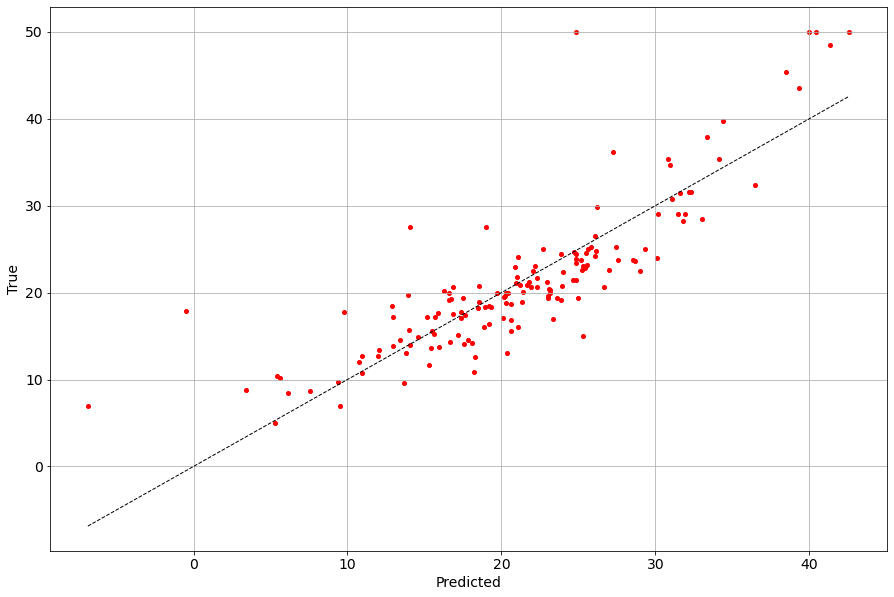

In [154]:
# Отображение графика
draw_predictions_plot(y_pred, y_test)

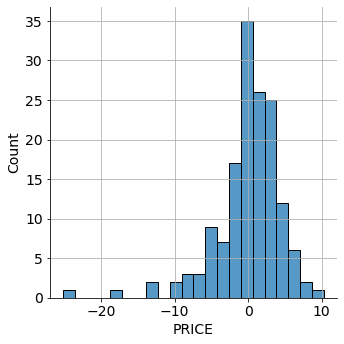

In [155]:
# График распределения ошибок
y_residuals = y_pred-y_test
sns.displot(y_residuals)
plt.grid()

In [156]:
# Функция для отображения метрик модели
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

In [157]:
# Отображение метрик
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


## Расширенный анализ данных

### Корреляция признаков

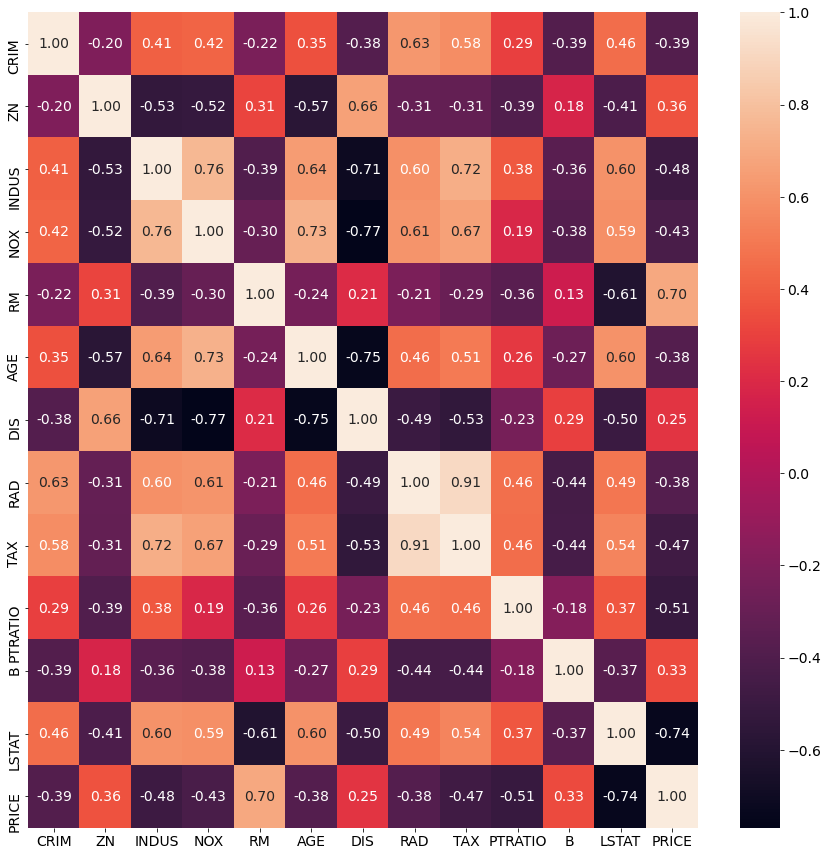

In [158]:
# Матрица корреляции для признаков
correlation_mtrx = df[np.append(feature_names, 'PRICE')].corr()
# Тепловая карта
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation_mtrx, ax=ax, annot=True, fmt='.2f')

Из графика видно, что наибольшая корреляция - между TAX (уровень налогов) и RAD (индекс доступности КАД), значит, какой-то из этих признаков можно будет исключить. Также высокий уровень корреляции наблюдается между NOX (концентрация вредых веществ в воздухе) и INDUS (уровень нежилой застройки), INDUS и TAX, NOX и TAX. Высокий уровень отрицательной корреляции - между DIS (удаленность от деловых центров) и NOX, DIS и AGE, DIS и INDUS.

С целевой величиной - PRICE - наибольшую корреляцию имеют показатели RM (число комнат) и (отрицательную) - LSTAT (процентное соотношение низших слоев населения).

Отобразим зависимость между наиболее коррелирующими величинами - TAX и RAD

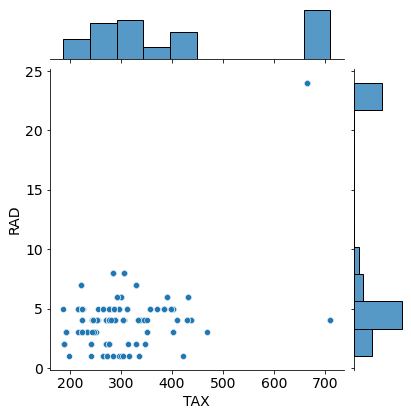

In [159]:
sns.jointplot(x="TAX", y="RAD", data=df)

Несмотря на высокое значение корреляции, на графике сложно определить однозначную зависимость между данными.

Рассмотрим зависимости цены от RM и от LSTAT

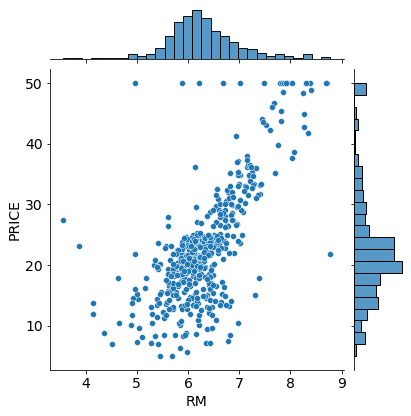

In [160]:
sns.jointplot(x="RM", y="PRICE", data=df)

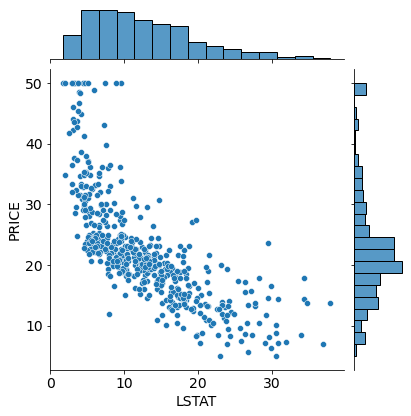

In [161]:
sns.jointplot(x="LSTAT", y="PRICE", data=df)

По графикам видна явная линейная зависимость между RM и PRICE, а также обратная зависимость вида 1/х между LSTAT и PRICE. Также на графике зависимости PRICE(RM) видны выбросы на уровне PRICE=50.

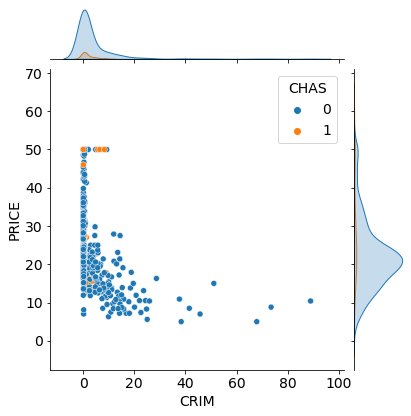

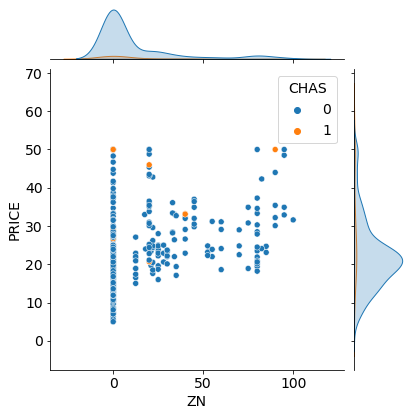

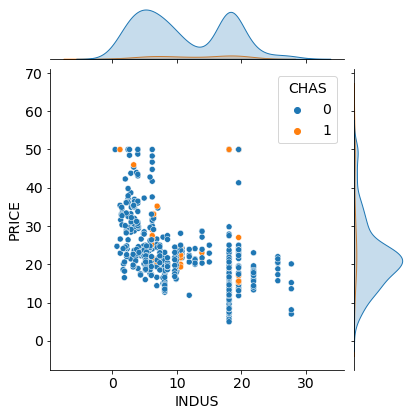

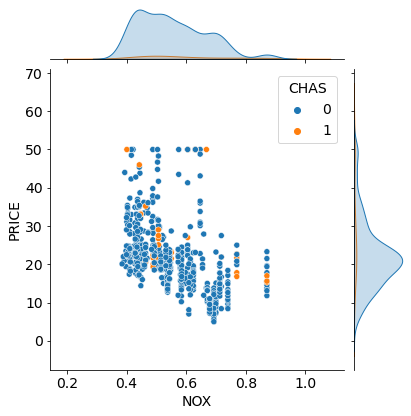

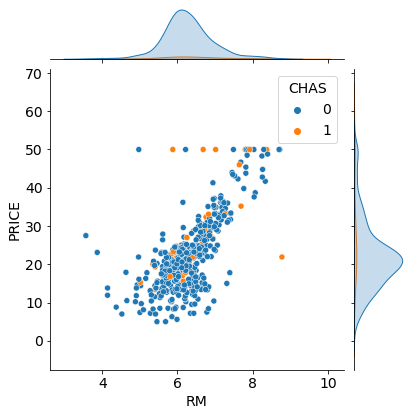

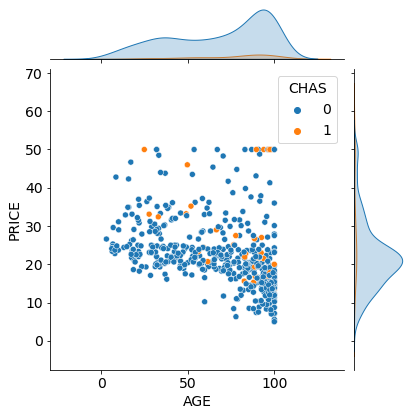

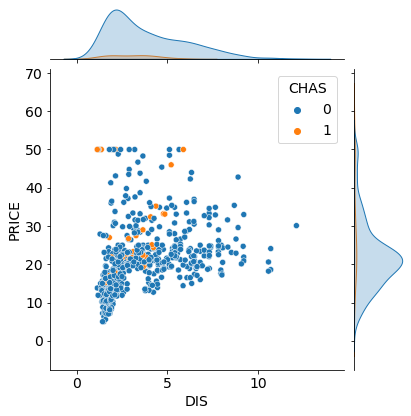

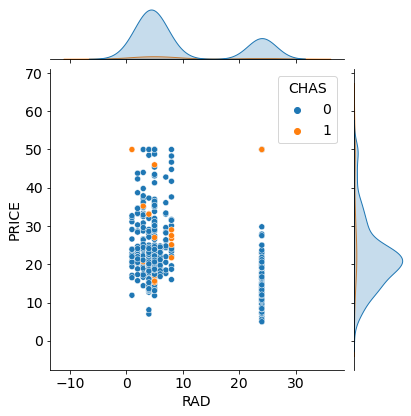

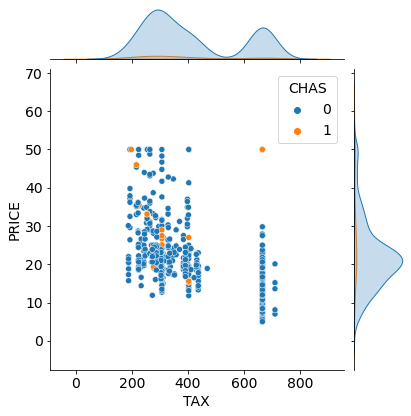

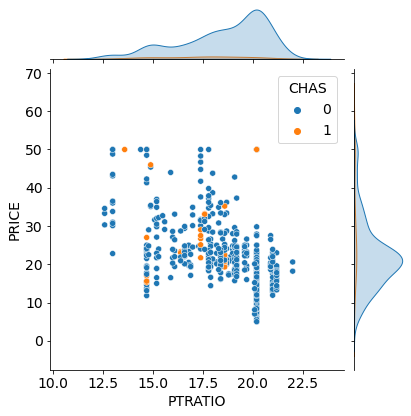

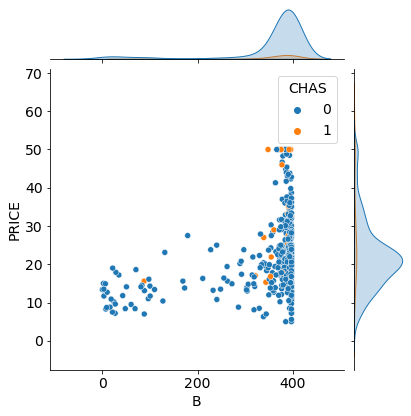

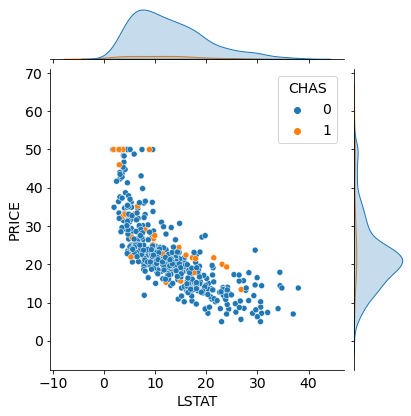

In [162]:
# Для отображения зависимостей PRICE от всех параметров уберем столбец CHAS
# и используем его как маркер
attributes = feature_names[np.argwhere(feature_names != 'CHAS')][:,0]
plot_data = df[np.append(attributes, 'PRICE')]

for attribute in attributes:
    sns.jointplot(x=attribute, y="PRICE", data=plot_data, hue=df["CHAS"])

Из графиков можно проследить следующие зависимости:
1) Цена резко падает при увеличении уровня преступности
2) Цена уменьшается при более высоком уровне нежилой застройки
3) Цена уменьшается при увеличении уровня загрязнения воздуха (что коррелирует с п.2 из-за корреляции данных между этими атрибутами)
4) Цена возрастает при увеличении числа комнат (что уже было рассмотрено)
5) Цена падает при увеличении процентного соотношения бедных слоев населения

Зависимости цены от остальных признаков проследить трудно.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


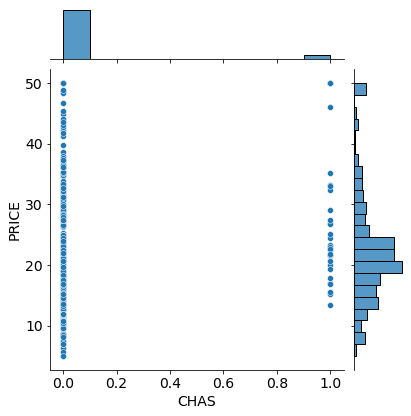

In [163]:
chas_data = df[np.array(["CHAS", "PRICE"])]
chas_data['CHAS'] = chas_data['CHAS'].astype(int)
sns.jointplot(x="CHAS", y="PRICE", data=chas_data)

Как видно из графика (и графиков выше), параметр CHAS (близость реки) не влияет на стоимость.

### Распределения признаков

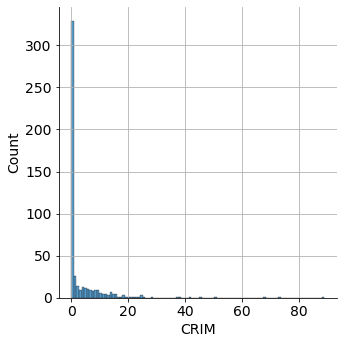

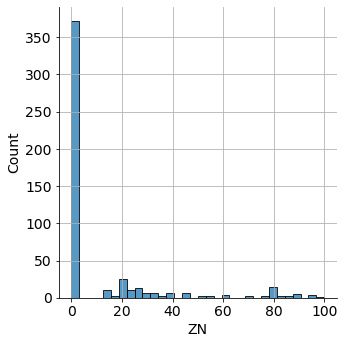

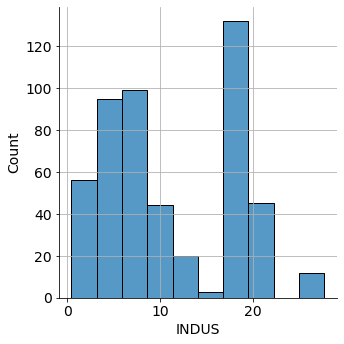

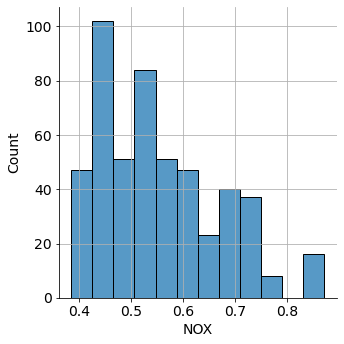

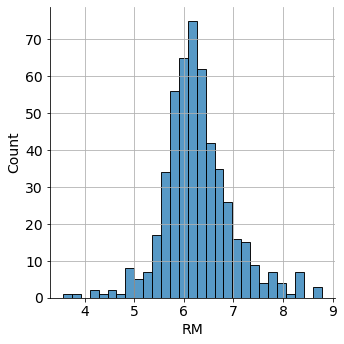

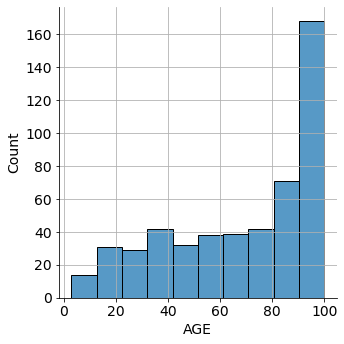

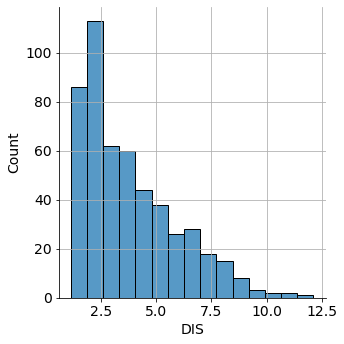

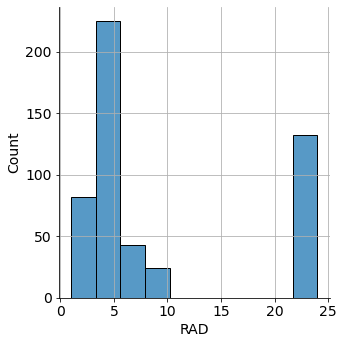

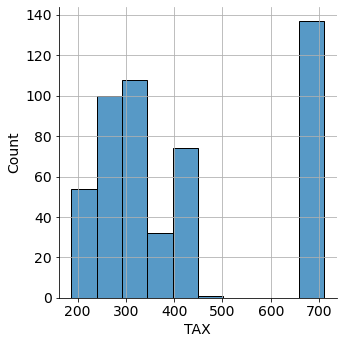

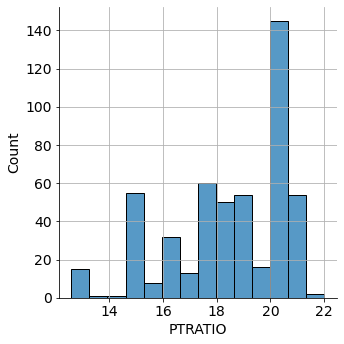

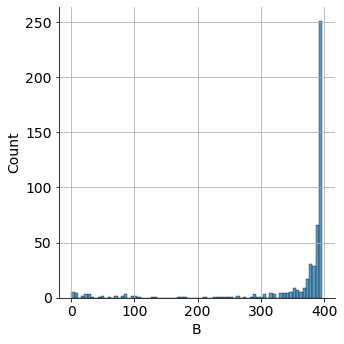

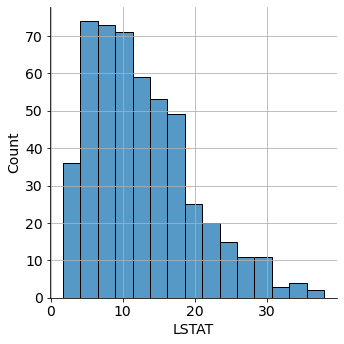

In [164]:
for attribute in attributes:
    sns.displot(df[attribute])
    plt.grid()

Как видно из графиков, только некоторые атрибуты имеют распределение, близкое к нормальному:
1) CRIM - с левым смещением
2) RM
3) AGE - с правым смещением
4) DIS - с левым
5) LSTAT - с левым
У остальных атрибутов наблюдается сложное распределение, часто не унимодальное.

## Применение инструментов нормализации данных

### Трансформер StandardScaler

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg_scaled = LinearRegression()

In [166]:
scaler_data = df[feature_names].to_numpy()
scaler.fit(scaler_data)
scaler_data = scaler.transform(scaler_data)
df_scaled = pd.DataFrame(scaler_data, columns=feature_names)
df_scaled["PRICE"] = target_data

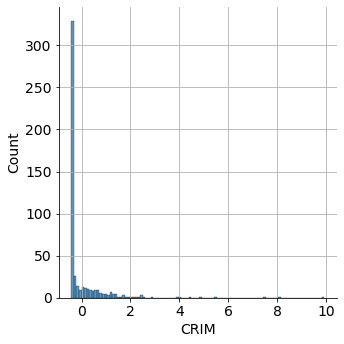

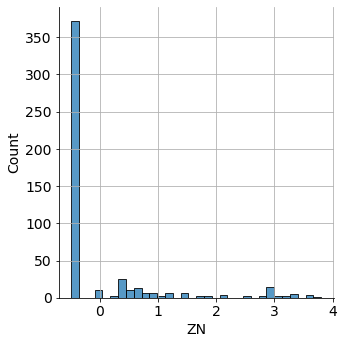

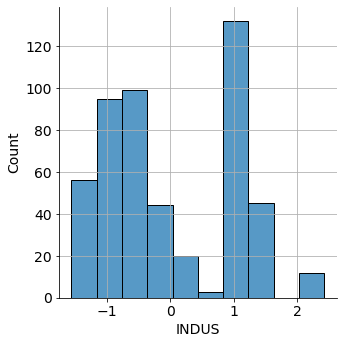

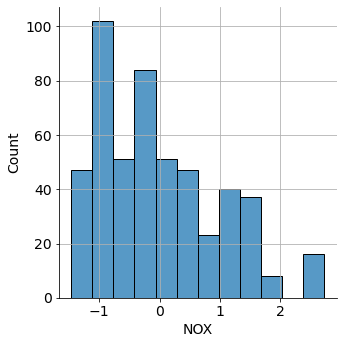

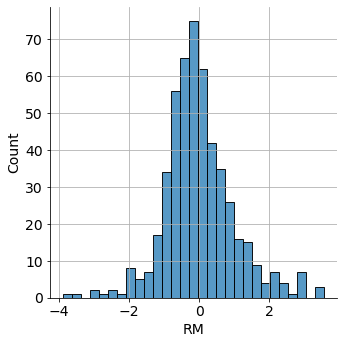

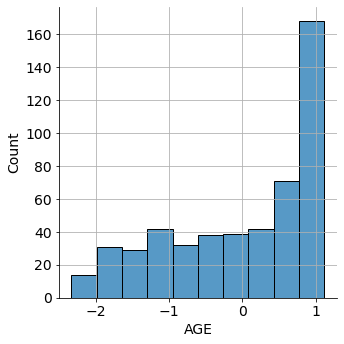

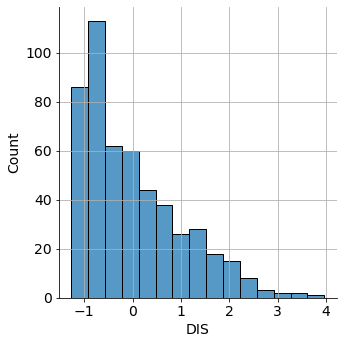

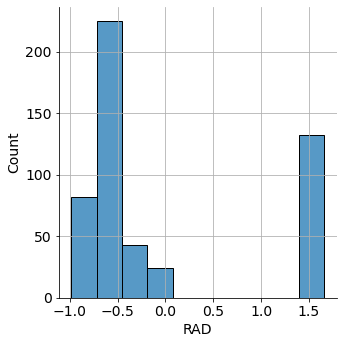

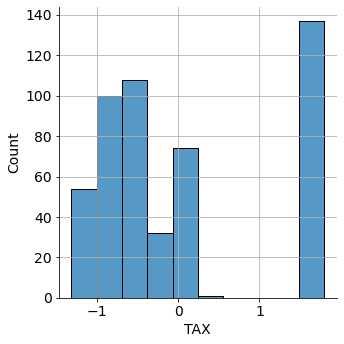

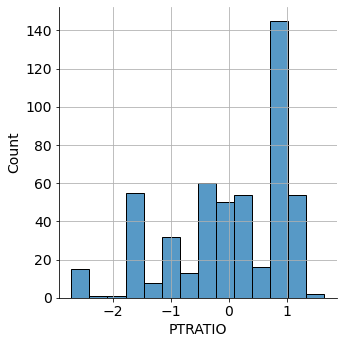

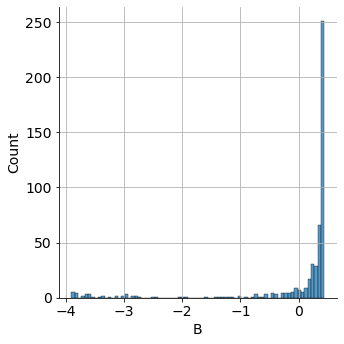

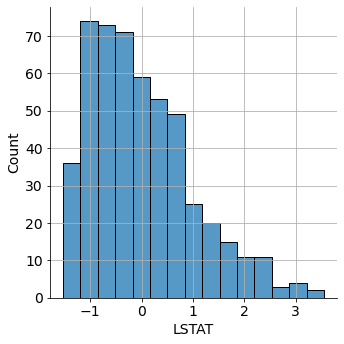

In [167]:
for attribute in attributes:
    sns.displot(df_scaled[attribute])
    plt.grid()

Обучим модель на нормированных данных и сравним метрики.

In [168]:
X_train_scaled = scaler.transform(X_train)
reg_scaled.fit(X_train_scaled, y_train)
show_linear_model_weights(reg_scaled, X_train.columns)


----- Weights -----
CRIM | -1.146914112977063
ZN | 0.8343260472084288
INDUS | 0.33940694449187003
CHAS | 0.7916361189986115
NOX | -1.7847269996533783
RM | 2.8478394858328167
AGE | -0.30429305867253376
DIS | -2.9156252061568333
RAD | 2.1114004458631586
TAX | -1.4651995080952975
PTRATIO | -1.969634695906929
B | 1.0756777102275348
LSTAT | -3.9031072691193813
Bias: 22.50945471291038


Порядок весов стал одинаковым.

In [169]:
X_test_scaled = scaler.transform(X_test)
y_pred_scaled = reg_scaled.predict(X_test_scaled)

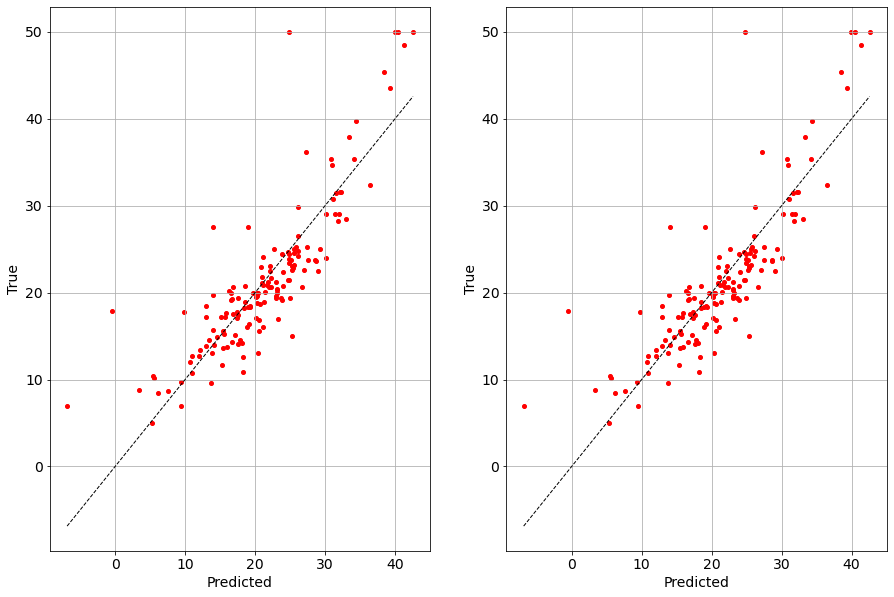

In [170]:
plt.subplot(1,2,1)
draw_predictions_plot(y_pred, y_test)
plt.subplot(1,2,2)
draw_predictions_plot(y_pred_scaled, y_test)

In [171]:
evaluate_regressor(reg, X_test, y_test, 'initial')
evaluate_regressor(reg_scaled, X_test_scaled, y_test, 'scaled')


----- Evaluation for initial -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537

----- Evaluation for scaled -----
  R2: 0.7112260057484925
  RMSE: 4.638689926172827
  MAE: 3.1627098714574107


Показатели и графики не изменились

### Трансформер MinMaxScaler

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg_minmax = LinearRegression()

In [173]:
scaler_data = df[feature_names].to_numpy()
scaler.fit(scaler_data)
scaler_data = scaler.transform(scaler_data)
df_scaled = pd.DataFrame(scaler_data, columns=feature_names)
df_scaled["PRICE"] = target_data

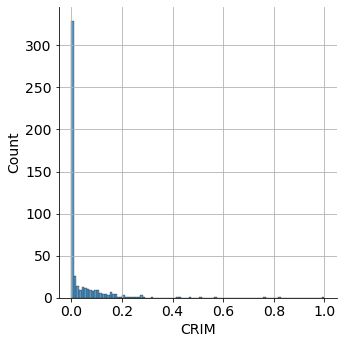

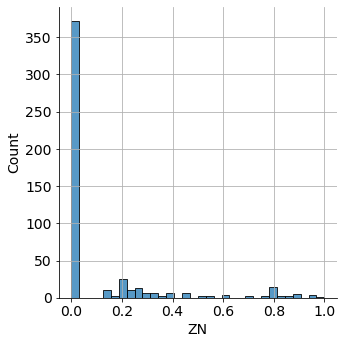

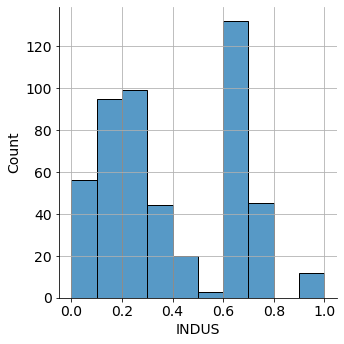

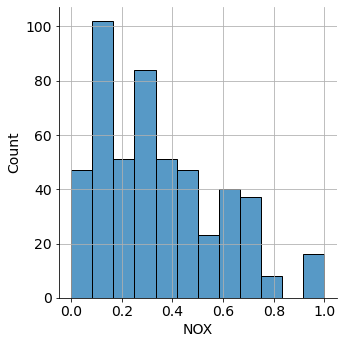

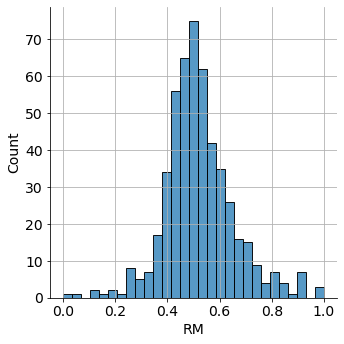

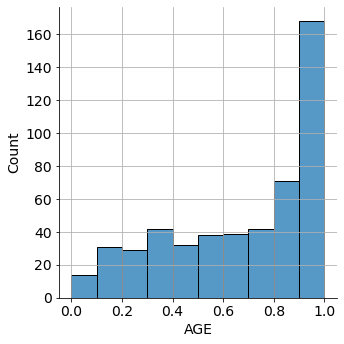

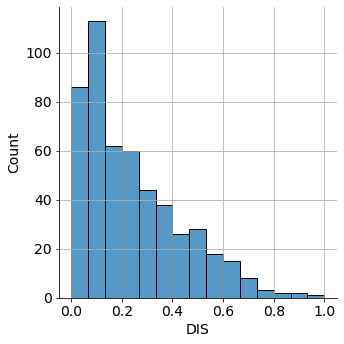

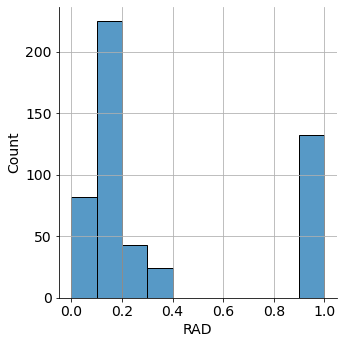

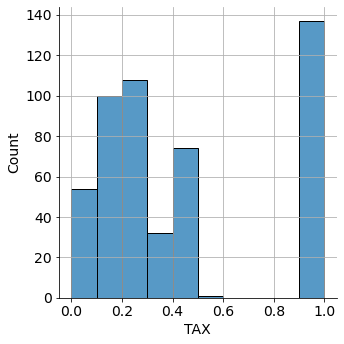

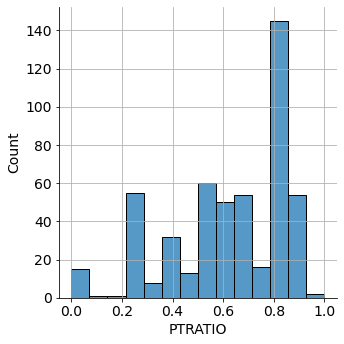

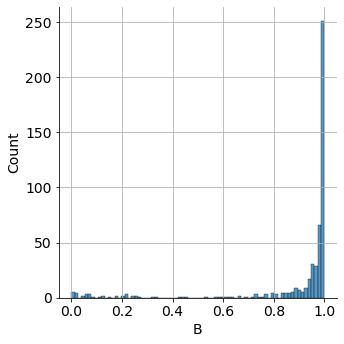

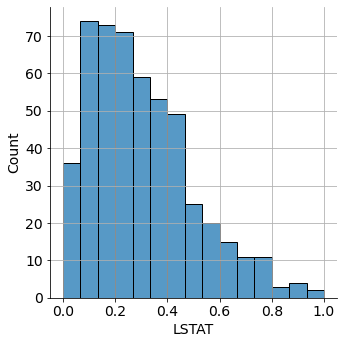

In [174]:
for attribute in attributes:
    sns.displot(df_scaled[attribute])
    plt.grid()

In [175]:
X_train_minmax = scaler.transform(X_train)
reg_minmax.fit(X_train_minmax, y_train)
show_linear_model_weights(reg_minmax, X_train.columns)


----- Weights -----
CRIM | -11.874819034414255
ZN | 3.5808913593233465
INDUS | 1.3509777616031013
CHAS | 3.1198351162853832
NOX | -7.492691595119094
RM | 21.174522789957287
AGE | -1.05070309645654
DIS | -15.241684080215874
RAD | 5.582728815911732
TAX | -4.5599708076071375
PTRATIO | -8.560440956236723
B | 4.6773104806765256
LSTAT | -19.8273864567402
Bias: 24.766178880283594


Веса сильно изменились.

In [176]:
X_test_minmax = scaler.transform(X_test)
y_pred_minmax = reg_minmax.predict(X_test_minmax)

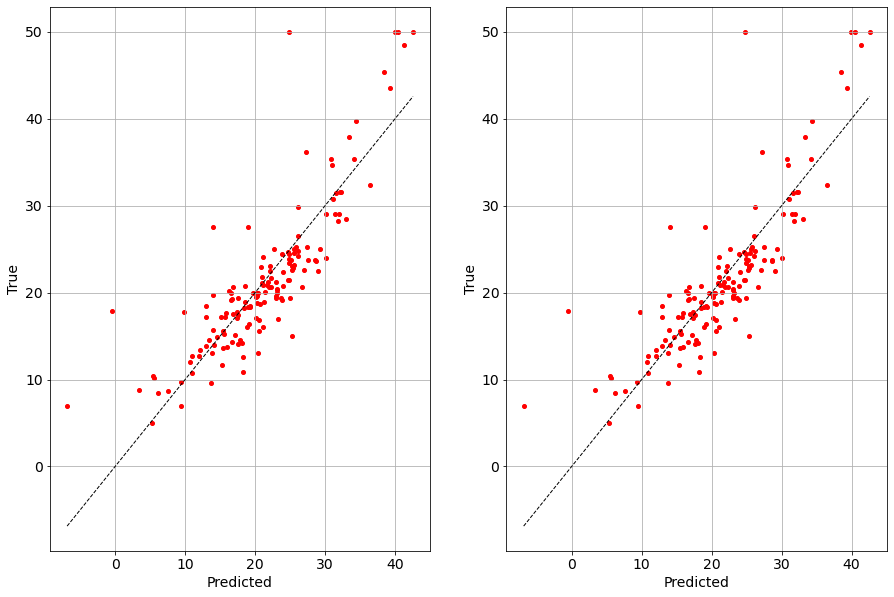

In [177]:
plt.subplot(1,2,1)
draw_predictions_plot(y_pred, y_test)
plt.subplot(1,2,2)
draw_predictions_plot(y_pred_minmax, y_test)

In [178]:
evaluate_regressor(reg, X_test, y_test, 'initial')
evaluate_regressor(reg_scaled, X_test_scaled, y_test, 'standart')
evaluate_regressor(reg_minmax, X_test_minmax, y_test, 'MinMax')


----- Evaluation for initial -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537

----- Evaluation for standart -----
  R2: 0.7112260057484925
  RMSE: 4.638689926172827
  MAE: 3.1627098714574107

----- Evaluation for MinMax -----
  R2: 0.7112260057484925
  RMSE: 4.638689926172827
  MAE: 3.1627098714574102


Показатели и графики не изменились

Таким образом, при нормализации данных модели имеют одинаковые метрики работы, но по весам можно определить "важность" атрибутов.

## Инструменты выравнивания распределений

### PowerTransformer

In [179]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
reg_power = LinearRegression()

In [180]:
transformer_data = df[feature_names].to_numpy()
transformer.fit(transformer_data)
transformer_data = transformer.transform(transformer_data)
df_transformed = pd.DataFrame(transformer_data, columns=feature_names)
df_transformed["PRICE"] = target_data

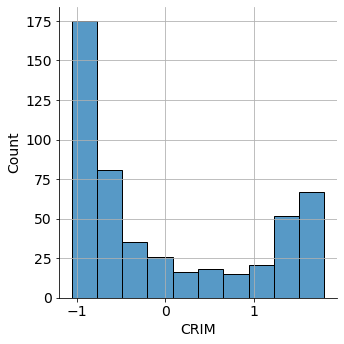

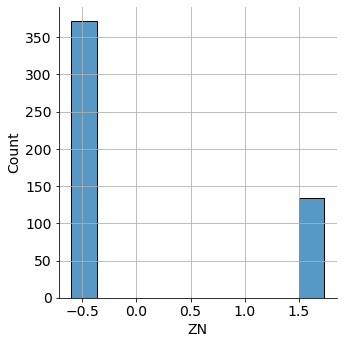

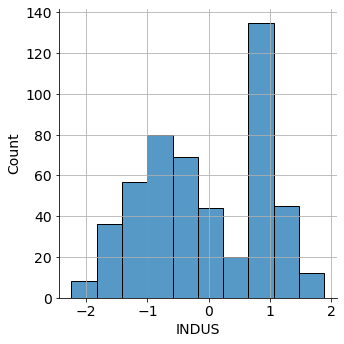

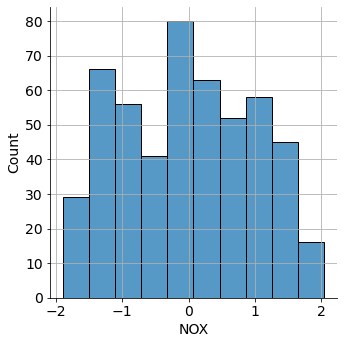

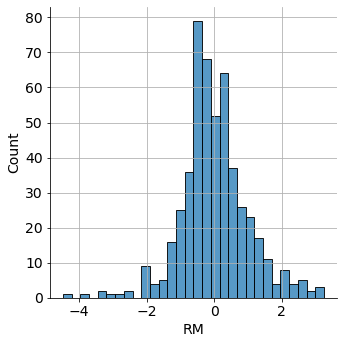

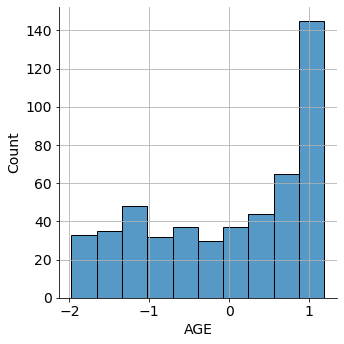

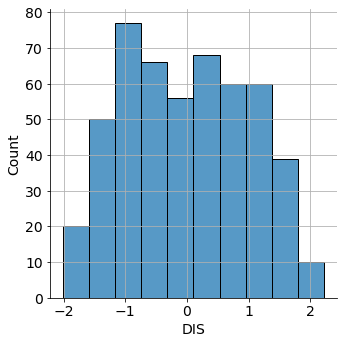

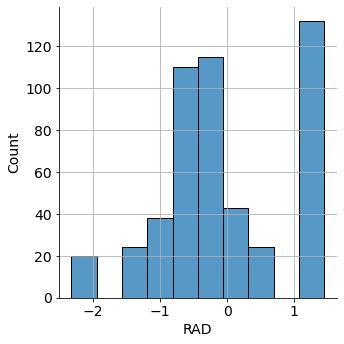

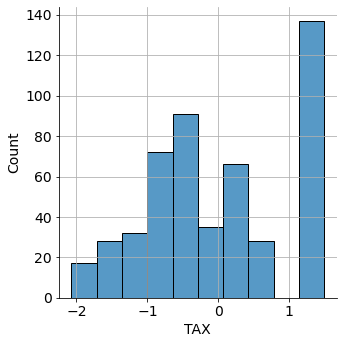

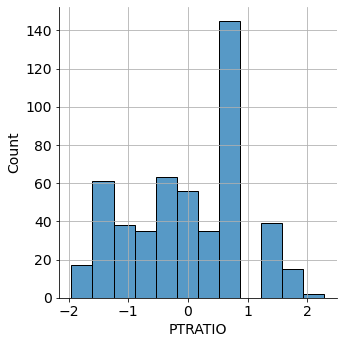

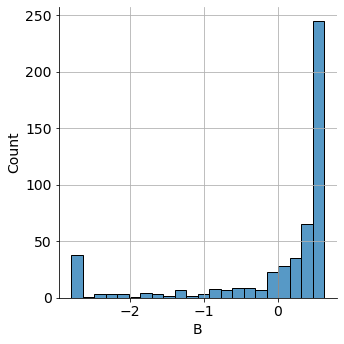

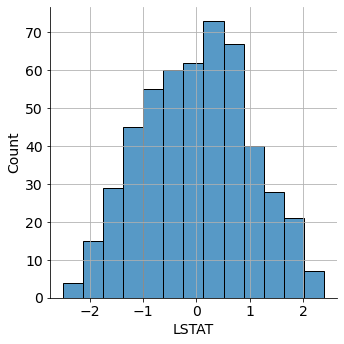

In [181]:
for attribute in attributes:
    sns.displot(df_transformed[attribute])
    plt.grid()

In [182]:
X_train_power = transformer.transform(X_train)
X_test_power = transformer.transform(X_test)
reg_power.fit(X_train_power, y_train)
show_linear_model_weights(reg_power, X_train.columns)


----- Weights -----
CRIM | 0.5378509276687573
ZN | 0.36327705423514445
INDUS | -0.31962640469349546
CHAS | 0.7121090778968344
NOX | -1.5838173159408886
RM | 1.9465847594734167
AGE | 0.007776537596747124
DIS | -3.2982178936940265
RAD | 0.8031303854618366
TAX | -1.5310172252401102
PTRATIO | -1.375653226214232
B | 0.5808994524922235
LSTAT | -5.772997034715367
Bias: 22.519561323031756


In [183]:
y_pred_power = reg_power.predict(X_test_power)

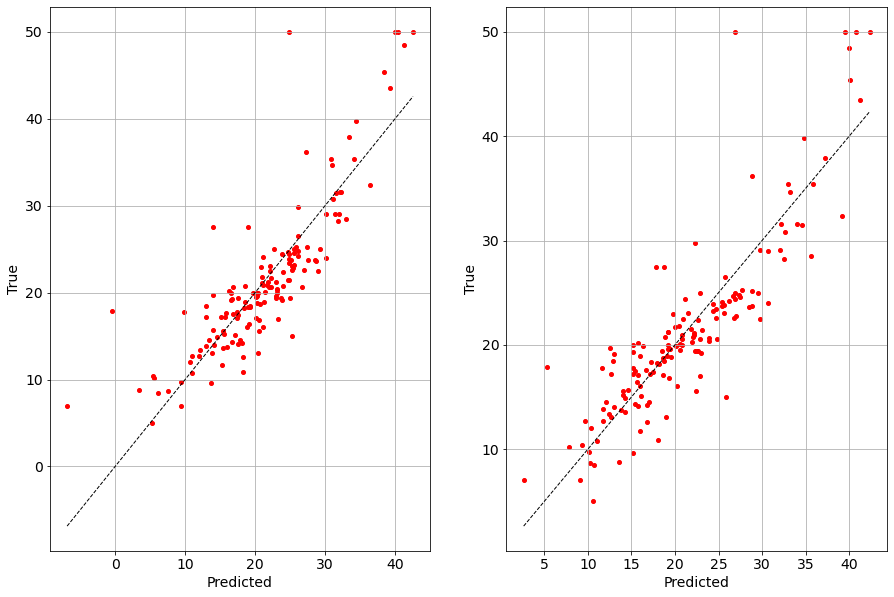

In [184]:
plt.subplot(1,2,1)
draw_predictions_plot(y_pred, y_test)
plt.subplot(1,2,2)
draw_predictions_plot(y_pred_power, y_test)

In [185]:
evaluate_regressor(reg, X_test, y_test, 'initial')
evaluate_regressor(reg_power, X_test_power, y_test, 'power')


----- Evaluation for initial -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537

----- Evaluation for power -----
  R2: 0.7581250433980318
  RMSE: 4.245332938269524
  MAE: 3.0030674462136835


Применение PowerTransformer позволило получить лучшие метрики.

### Quantile Transformer

In [186]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(n_quantiles=100,output_distribution='normal')
reg_quantile = LinearRegression()

In [187]:
transformer_data = df[feature_names].to_numpy()
transformer.fit(transformer_data)
transformer_data = transformer.transform(transformer_data)
df_transformed = pd.DataFrame(transformer_data, columns=feature_names)
df_transformed["PRICE"] = target_data

In [188]:
X_train_quantile = transformer.transform(X_train)
X_test_quantile = transformer.transform(X_test)
reg_quantile.fit(X_train_quantile, y_train)
show_linear_model_weights(reg_quantile, X_train.columns)


----- Weights -----
CRIM | -0.7447231358302904
ZN | 0.22727639263879862
INDUS | -0.09247563800725991
CHAS | 0.25339422312119325
NOX | -1.0143407683097203
RM | 1.5316487013793576
AGE | -0.06390512011093549
DIS | -3.398311877936532
RAD | 0.08849506944216179
TAX | -1.1716122172404562
PTRATIO | -1.3521890717553353
B | -0.10092201534986292
LSTAT | -5.4454087992989875
Bias: 24.550663977973294


In [189]:
y_pred_quantile = reg_quantile.predict(X_test_quantile)

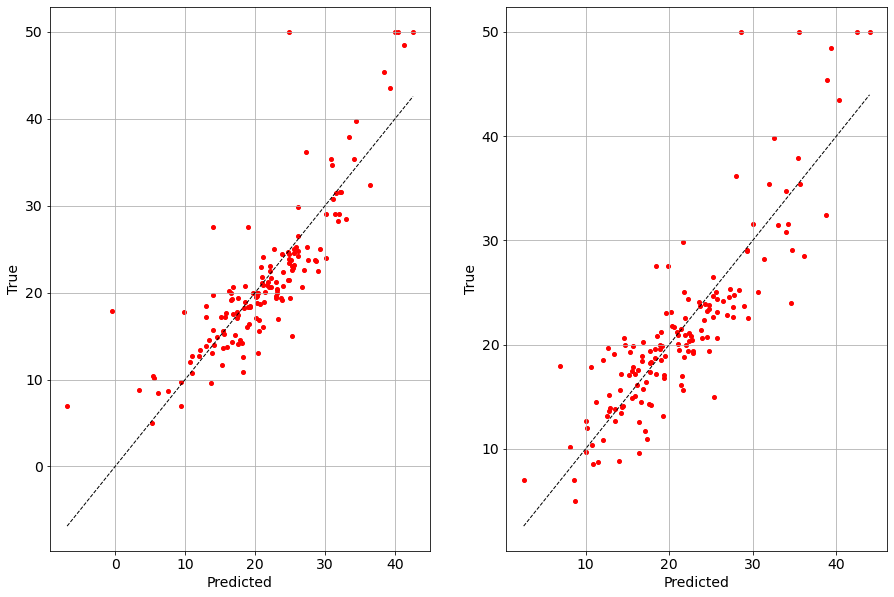

In [190]:
plt.subplot(1,2,1)
draw_predictions_plot(y_pred, y_test)
plt.subplot(1,2,2)
draw_predictions_plot(y_pred_quantile, y_test)

In [191]:
evaluate_regressor(reg, X_test, y_test, 'initial')
evaluate_regressor(reg_quantile, X_test_quantile, y_test, 'quantile')


----- Evaluation for initial -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537

----- Evaluation for quantile -----
  R2: 0.7431128986514992
  RMSE: 4.375094642740107
  MAE: 3.166520763275924


Метрики улучшились незначительно

## Исключение выбросов на уровне PRICE = 50

In [192]:
df_WO50=df[df['PRICE'] != 50]

X = df_WO50[feature_names]
y = df_WO50['PRICE']

X_train_WO50, X_test_WO50, y_train_WO50, y_test_WO50 = train_test_split(
    X, y, 
    train_size=0.7,
    random_state=RANDOM_STATE
)

In [193]:
reg_WO50 = LinearRegression();
reg_WO50.fit(X_train_WO50, y_train_WO50)

show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632


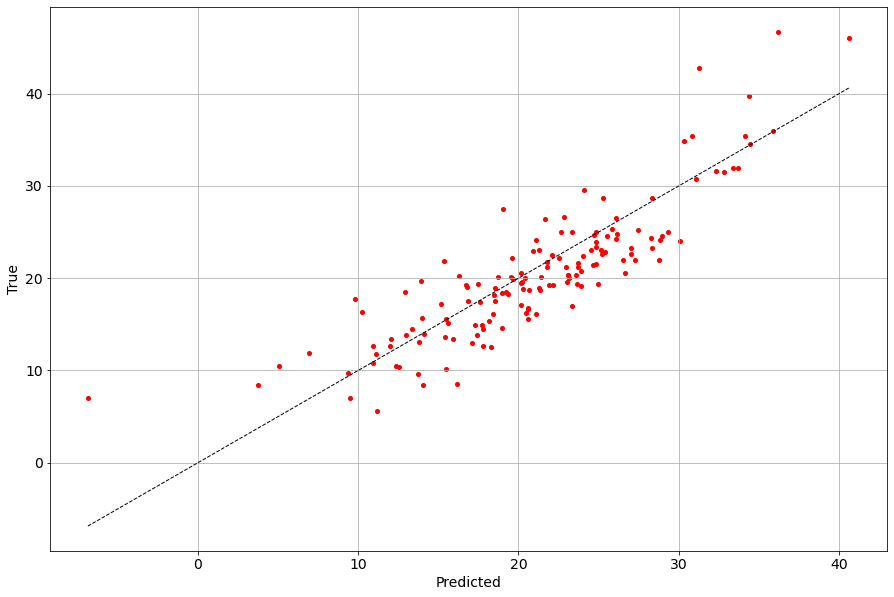

In [194]:
y_pred = reg.predict(X_test_WO50)
draw_predictions_plot(y_pred, y_test_WO50)

In [195]:
evaluate_regressor(reg, X_train_WO50, y_train_WO50, 'train')
evaluate_regressor(reg, X_test_WO50, y_test_WO50, 'test')


----- Evaluation for train -----
  R2: 0.740206189494674
  RMSE: 4.104217717811306
  MAE: 3.004815571939225

----- Evaluation for test -----
  R2: 0.7298848470321656
  RMSE: 3.766047039150028
  MAE: 2.9266909267944476


На графике отсутствуют выбросы, метрики RMSE и MAE улучшились.

### Оценим работу модели при исключении каждого признака

In [196]:
def get_regressor_evals(reg, x, y):
  y_pred = reg.predict(x)
  r2 = r2_score(y, y_pred)
  rmse = np.sqrt(mean_squared_error(y, y_pred))
  mae = mean_absolute_error(y, y_pred)
  return r2, rmse, mae

In [197]:
y = df['PRICE']
evaluations = pd.DataFrame(columns = ['R2', 'RMSE', 'MAE'], index=list(feature_names))

for feature in feature_names:
  X = df.drop(columns=[feature, 'PRICE'])
  X_train_exclude, X_test_exclude, y_train_exclude, y_test_exclude = train_test_split(
    X, y, 
    train_size=0.7,
    random_state=RANDOM_STATE
  )
  reg = LinearRegression();
  reg.fit(X_train_exclude, y_train_exclude)
  y_pred_exclude = reg.predict(X_test_exclude)
  evaluations.loc[feature,['R2', 'RMSE', 'MAE']]=get_regressor_evals(reg, X_test_exclude, y_test_exclude)

print(evaluations)

               R2     RMSE      MAE
CRIM     0.715061  4.60778  3.13734
ZN       0.697831  4.74505  3.24995
INDUS     0.71241  4.62917  3.14422
CHAS     0.708814  4.65802  3.20433
NOX      0.690537  4.80198  3.23687
RM       0.683052  4.85971  3.49986
AGE      0.713868  4.61742  3.12911
DIS      0.670199  4.95726  3.33199
RAD      0.688301   4.8193  3.28564
TAX      0.698385   4.7407  3.24129
PTRATIO  0.676421  4.91028  3.50369
B        0.716621  4.59516  3.18866
LSTAT    0.675248  4.91918  3.21931


Как видно из метрик, наихудшие показатели метрик получились при исключении метрик, наиболее коррелирующих с ценой: RN, PTRATIO, LSTAT.

## Трансформер PolinomialFeatures

In [198]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 2)
reg = LinearRegression();
polynom.fit(np.array(X_train['LSTAT']).reshape(-1, 1))

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [199]:
X_train_pol = polynom.transform(np.array(X_train['LSTAT']).reshape(-1, 1))
X_test_pol = polynom.transform(np.array(X_test['LSTAT']).reshape(-1, 1))
X_train_pol = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_pol), axis=1) 
X_test_pol = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_pol), axis=1)

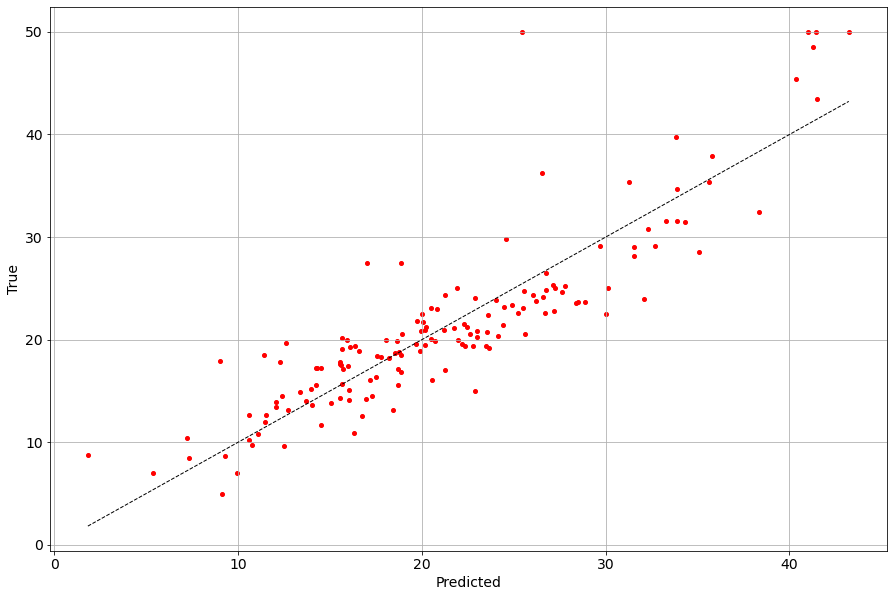

In [200]:
reg.fit(X_train_pol, y_train)
y_pred = reg.predict(X_test_pol)
draw_predictions_plot(y_pred, y_test)

In [201]:
evaluate_regressor(reg, X_train_pol, y_train, 'train')
evaluate_regressor(reg, X_test_pol, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7900154484992744
  RMSE: 4.296150987499626
  MAE: 3.103043927750793

----- Evaluation for test -----
  R2: 0.7734457360506537
  RMSE: 4.108680995278827
  MAE: 2.9527724878930814


Метрики значительно улучшились.

## Ридж регрессия

### Базовая модель


----- Evaluation for train -----
  R2: 0.7415671063241829
  RMSE: 4.766062781838816
  MAE: 3.3419355089653857

----- Evaluation for test -----
  R2: 0.7041586727559435
  RMSE: 4.695109486461526
  MAE: 3.178539076034557


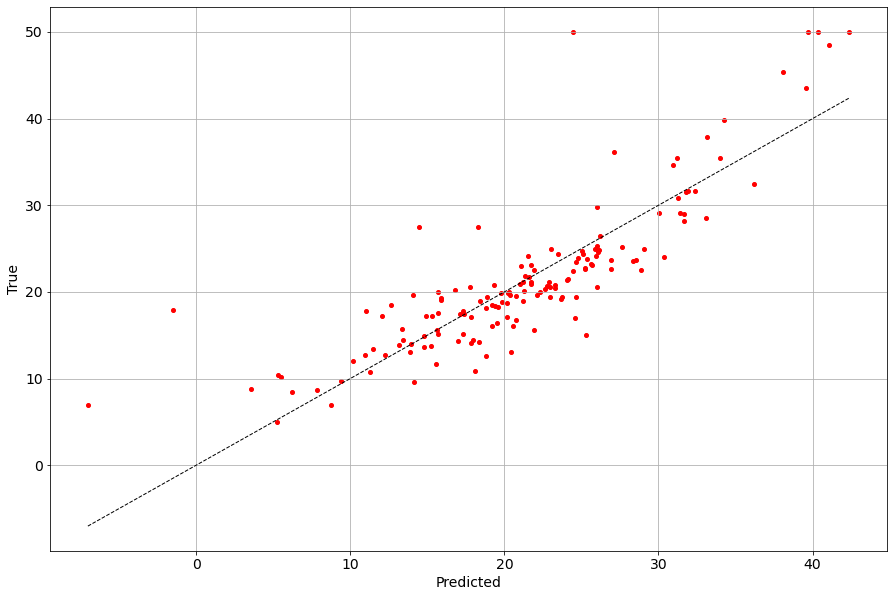

In [202]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')

### С методами нормализации и выравнивания распределений

### Standart Scaler

In [203]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg = Ridge(alpha=1)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.743482391414018
  RMSE: 4.748368933454408
  MAE: 3.3520641215891938

----- Evaluation for test -----
  R2: 0.7108071617209415
  RMSE: 4.6420527351841026
  MAE: 3.161026516515537


### Min Max Scaler

In [205]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg = Ridge(alpha=1)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7387251833812362
  RMSE: 4.792196740950352
  MAE: 3.3491646276433173

----- Evaluation for test -----
  R2: 0.711020981158772
  RMSE: 4.640336329192624
  MAE: 3.1087318709305003


### Power Transformer

In [213]:
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg = Ridge(alpha=1)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7671538602313817
  RMSE: 4.523976964245666
  MAE: 3.342412393327308

----- Evaluation for test -----
  R2: 0.740795451130297
  RMSE: 4.394784786716414
  MAE: 3.157433953239507


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


### Quantile Transformer

In [214]:
scaler = QuantileTransformer(n_quantiles=100)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg = Ridge(alpha=1)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7333958029915196
  RMSE: 4.840824686368675
  MAE: 3.662930883395726

----- Evaluation for test -----
  R2: 0.7104084901501511
  RMSE: 4.645251322488881
  MAE: 3.349143391428214


Как видно из метрик, наилучшего результата позволил добиться PowerTransformer.

### Оценим работу Ридж регрессии при различных альфа

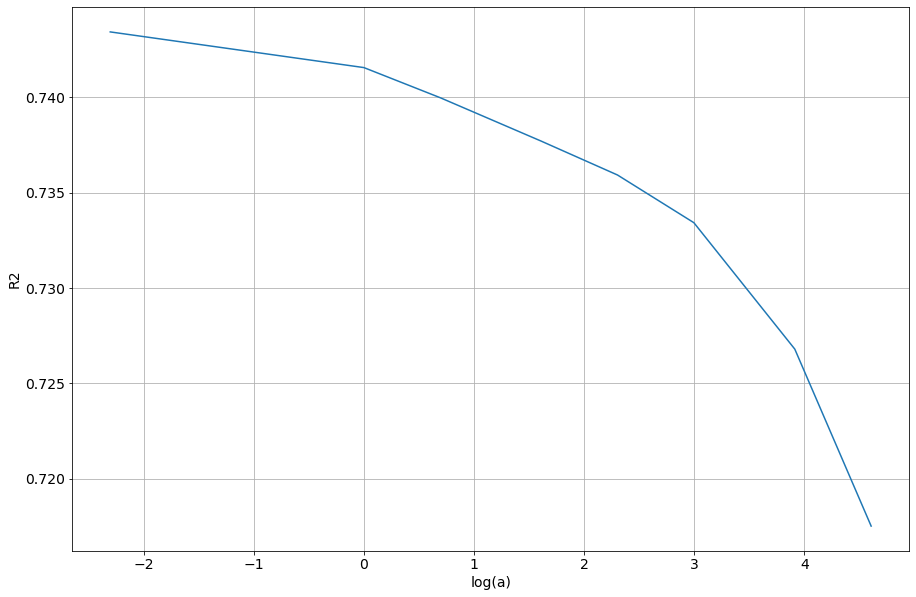

In [218]:
R2s = []
alphas = [0.1, 1, 2, 5, 10, 20, 50, 100]
for a in alphas:
  reg = Ridge(alpha=a);
  reg.fit(X_train, y_train)
  R2s.append(get_regressor_evals(reg, X_train, y_train)[0])

plt.plot(np.log(alphas), R2s)
plt.xlabel('log(a)')
plt.ylabel('R2')
plt.grid()
plt.show()

## Лучшая модель

Для создания лучшей модели используем следующие шаги:


*   Избавимся от выбросов на уровне PRICE = 50
*   Исключим фичи, наименее коррелирующие с ценой
*   Используем Power Transformer
*   Добавим фичу LSTAT^2
*   Используем регрессию Ридж с наименьшим альфа



In [244]:
best_df = df[df['PRICE'] != 50]
target_data = best_df['PRICE']

features = ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
X = best_df[features]
y = target_data

In [249]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    random_state=RANDOM_STATE
)

In [251]:
poly = PolynomialFeatures(degree = 2)
poly.fit(np.array(X_train['LSTAT']).reshape(-1, 1))
X_train_pol = polynom.transform(np.array(X_train['LSTAT']).reshape(-1, 1))
X_test_pol = polynom.transform(np.array(X_test['LSTAT']).reshape(-1, 1))
X_train_pol = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_pol), axis=1) 
X_test_pol = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_pol), axis=1)

In [253]:
scaler = PowerTransformer()
scaler.fit(X_train_scaled)
X_train_scaled = scaler.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Evaluation for train -----
  R2: 0.7584518968757801
  RMSE: 3.9574715967962955
  MAE: 2.9913408517407576

----- Evaluation for test -----
  R2: 0.760220275550781
  RMSE: 3.548276823856772
  MAE: 2.8226050742517423


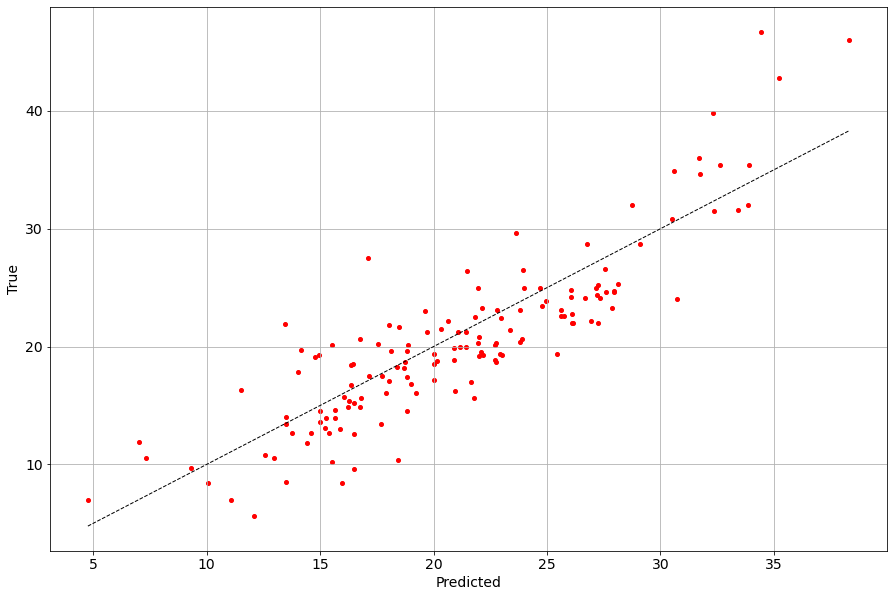

In [255]:
reg = Ridge(alpha=0.1)
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

Как видно из метрик, благодаря проделанным операциям удалось добиться максимального показателя R2 и минимальных показателей RMSE и MAE, поэтому можно сказать, что полученная модель - наилучшая.